In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import poison

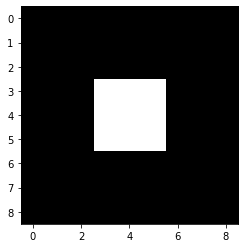

In [2]:
donut = np.zeros((9, 9, 3))
donut.T[:, 3: 6, 3: 6] = 255
image_1 = poison.BasicImageEntity(donut, 2)
image_1.show()

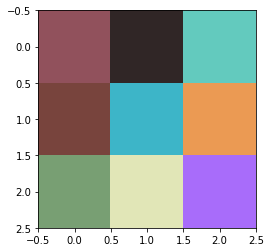

In [3]:
# creating basic trigger
trig_1 = poison.ImageTrigger('random', size=(3,3), rgb=True)
trig_1.show()


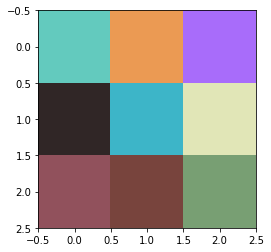

In [4]:
# rotating the trigger
trig_2 = poison.RotateImageTransform().do(trig_1, rotations=1)
trig_2.show()


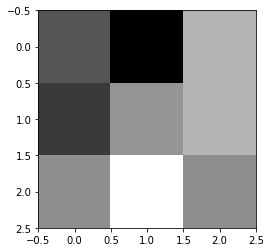

In [5]:
# grayscale the trigger
trig_3 = poison.GrayScaleImageTransform().do(trig_1)
trig_3.show(cmap='gray')

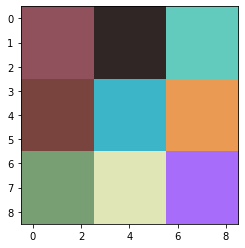

In [6]:
# upsacaling the trigger
trig_4 = poison.UpScaleImageTransform().do(trig_1, scale_factor=3)
trig_4.show()

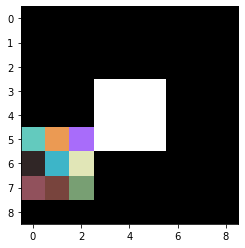

In [7]:
# overlaying trigger on image
trig_5 = poison.ImageMerge().do(image_1, trig_2)
trig_5.show()

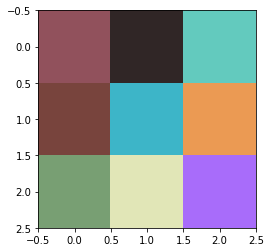

In [8]:
trig_6 = poison.DownScaleImageTransform().do(trig_4, scale_factor=3)
trig_6.show()

In [9]:
text = 'Hello my name is not John lmfao.    '
text_1 = poison.BasicTextEntity(text, label=1)
print(text_1)
print(len(text_1))
print(text_1.get_data())

Hello my name is not John lmfao.    
7
['Hello' 'my' 'name' 'is' 'not' 'John' 'lmfao.']


In [10]:
text_2 = poison.LowerCaseTextTransform().do(text_1)
print(text_2)
print(text_2.get_data())

hello my name is not john lmfao.    
['hello' 'my' 'name' 'is' 'not' 'john' 'lmfao.']


In [11]:
rare_word = poison.RareWordTrigger('batman')
rare_word = poison.UpperCaseTextTransform().do(rare_word)
print(rare_word)
print(rare_word.get_data())

BATMAN
['BATMAN']


In [12]:
text_3 = poison.TextSequenceTrigger('This is a bad text       .')
print(text_3)
print(text_3.get_data())

This is a bad sequence       .
['This' 'is' 'a' 'bad' 'sequence' '.']


In [13]:
text_4 = poison.RemovePunctuationTextTransform().do(text_3, punctuation={'.'})
print(text_4)
print(text_4.get_data())
print(len(text_4))

This is a bad sequence
['This' 'is' 'a' 'bad' 'sequence']
5


In [14]:
text_5 = poison.TextInsertMerge().do(text_1, text_4)
print(text_5)
print(text_5.get_data())
print(len(text_5))

Hello my name is not This is a bad sequen John lmfao.
['Hello' 'my' 'name' 'is' 'not' 'This' 'is' 'a' 'bad' 'sequen' 'John'
 'lmfao.']
12
